# Exercises Unit 2 - Frames - (BDIVS)

## 1 - Implementation of DFT
- Analysis operator (direct transformation)
- Reproducible formula (inverse transformation)


### Download an example image
- Try also with your own images

In [61]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/butterfly.jpg -O butterfly.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O lena.jpg


--2023-02-13 15:07:46--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/butterfly.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44746 (44K) [image/jpeg]
Saving to: ‘butterfly.jpg’

butterfly.jpg       100%[===================>]  43.70K  --.-KB/s    in 0.01s   

2023-02-13 15:07:46 (3.49 MB/s) - ‘butterfly.jpg’ saved [44746/44746]

--2023-02-13 15:07:46--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
S

### Read image

In [62]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

Image dimensions: (106, 147, 3)


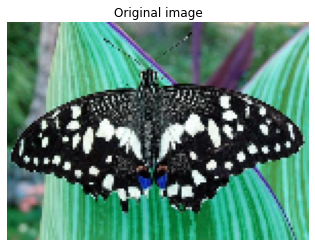

Gray scale image dimensions: (106, 147)


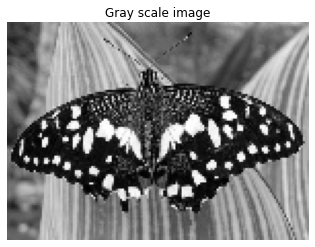

In [63]:
# Read image
img = cv2.imread('butterfly.jpg')

# Resize image
scale_percent = 30 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img, dim)
print(f'Image dimensions: {img.shape}')

# Image display
plt.imshow(img)
plt.axis('off')
plt.title('Original image')
plt.show()

# Gray scale conversion
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f'Gray scale image dimensions: {img_gray.shape}')

# Gray scale image display
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Gray scale image')
plt.show()

### Analysis operator (direct transformation)

**Función matrizDFT()**

Función que debe calcular el operador director (una matriz) de la transformada discreta de Fourier (a completar por el alumno).

No utilice el factor normalización en la transformación directa, solo en la transformación inversa.

Parámetros de entrada:
- dim: dimensión de la señal unidimensional a la que se aplicaría el operador.

In [64]:
# 2D matrix to 1D vector
[h,w] = img_gray.shape
dim = h*w
img_gray_1D = img_gray.reshape([1, dim])

In [65]:
def matrizDFT(dim):
  m = np.zeros((dim, dim), dtype=complex)
  for r in range(0, dim):
      for s in range(0, dim):
          m[r,s] = np.exp(-1j*2*np.pi*r*s/dim)

  return m

In [76]:
'''
st = time.time()

mdft = matrizDFT(dim)  

elapsed_time = time.time() - st
print(f"Elapse time: {elapsed_time} seconds")
'''

'\nst = time.time()\n\nmdft = matrizDFT(dim)  \n\nelapsed_time = time.time() - st\nprint(f"Elapse time: {elapsed_time} seconds")\n'

In [67]:
st = time.time()

mdftbis = np.fft.fft(np.eye(dim))  # Check that the computed DFT is the same as the one obtained with NumPy

elapsed_time = time.time() - st
print(f"Elapse time: {elapsed_time} seconds")

Elapse time: 10.386273622512817 seconds


In [68]:
#res = sum(sum(abs(mdft-mdftbis)))  # The result should be very low
#print(res)

In [69]:
img_DFT = img_gray_1D @ mdftbis;  # Compute the direct DFT of the image 

### Reproducible formula (inverse transformation)

6.192868371565707e-09


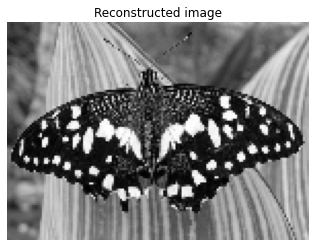

In [70]:
mdft_inv = np.conjugate(mdftbis)
img_rec = (img_DFT @ mdft_inv)/dim # Compute the inverse DFT of the image (applying the required normalization factor)
img_rec_2D = img_rec.reshape([h, w])

res = sum(sum(abs(img_gray-img_rec_2D)))  # Check the quality of the reconstructed image
print(res)

# Visualization of reconstructed image
plt.imshow(np.abs(img_rec_2D), cmap='gray')  # Function abs() force that the image has only real values, avoiding the appearance of very low imaginary values due to finite precision
plt.axis('off')
plt.title('Reconstructed image')
plt.show()

## 2 - Selection of transformed components for reconstruction

### Read image and compute 2D DFT transformed components


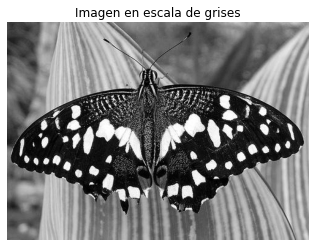

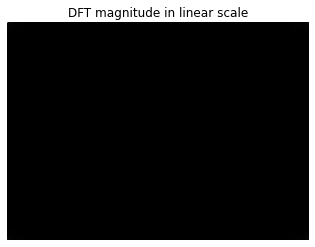

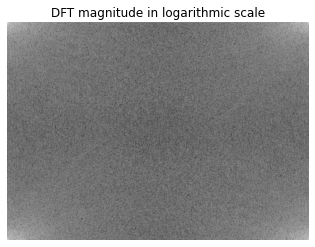

In [71]:
img = cv2.imread('butterfly.jpg')
# Conversión a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Visualizacíon de la imagen en escala e grises
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Imagen en escala de grises')
plt.show()

# Cálculo fft
img_DFT = np.fft.fft2(img_gray)

# Display the DFT magnitude in linear scale
plt.imshow(np.abs(img_DFT), cmap='gray') 
plt.axis('off')
plt.title('DFT magnitude in linear scale')
plt.show()

# Display the DFT magnitude in logarithmic scale (to improve the visualization of the dynamic range)
plt.imshow(np.log(np.abs(img_DFT)), cmap='gray') 
plt.axis('off')
plt.title('DFT magnitude in logarithmic scale')
plt.show()

### Random selection of transformed components

- 1D to 2D index conversion. Ver https://stackoverflow.com/questions/41914872/how-to-use-a-linear-index-to-access-a-2d-array-in-python

In [72]:
N = 10  # Percentage of components used for reconstruction
num_comp = round(img_DFT.size*N/100)  # Number of components used for reconstruction
sel1 = np.random.choice(img_DFT.size, num_comp)  # Random selection of components from the transformed image
ind_2d = np.unravel_index(sel1, img_DFT.shape, 'F')  
img_DFT_Sel1 = np.zeros_like(img_DFT)
img_DFT_Sel1[ind_2d] = img_DFT[ind_2d]  # Image containing only the selected components


Image reconstruction

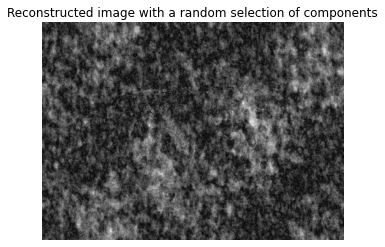

In [73]:
img_rec = abs(np.fft.ifft2(img_DFT_Sel1))

# Visualization of the reconstructed image
plt.imshow(img_rec, cmap='gray')
plt.axis('off')
plt.title('Reconstructed image with a random selection of components')
plt.show()


### Selection of components of highest energy (in absolute value)

- Selection of indeces of the highest value components: https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array

In [74]:
N = 10  
num_comp = round(img_DFT.size*N/100)  
sel2 = np.argpartition(abs(img_DFT), kth=-num_comp, axis=None)[-num_comp:]  # Selection of indeces of the highest value components
ind_2d = np.unravel_index(sel2, img_DFT.shape, 'C')
img_DFT_Sel2 = np.zeros_like(img_DFT)
img_DFT_Sel2[ind_2d] = img_DFT[ind_2d]  


### Image reconstruction using the transformed components of highest energy 


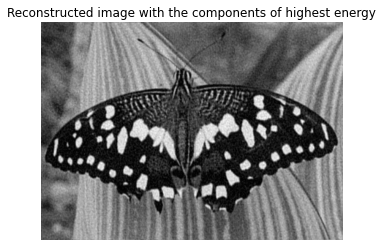

In [75]:
img_rec2 = abs(np.fft.ifft2(img_DFT_Sel2))

# Visualization of the reconstructed image
plt.imshow(img_rec2, cmap='gray')
plt.axis('off')
plt.title('Reconstructed image with the components of highest energy')
plt.show()